# Application de l'algorithme CAH sur le jeu de données "mtcars".


mtcars (test routier de voiture de tendance automobile) comprend la consommation de carburant, les performances et 10 aspects de la conception automobile pour 32 automobiles.

In [ ]:
options(warn=0)
library(dplyr)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [ ]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


# Calcul de la matrice de distance


La matrice de distance peut être calculée à l'aide de la fonction dist(). Cette fonction calcule et renvoie la matrice de distance calculée en utilisant la mesure de distance spécifiée pour calculer les distances entre les lignes d'une matrice de données:c'est le calcul de dissimilarité.
nous utilisons la distance euclidienne.

In [ ]:
# Dissimilarity matrix
d <- dist(mtcars, method = "euclidean")
d

                      Mazda RX4 Mazda RX4 Wag  Datsun 710 Hornet 4 Drive
Mazda RX4 Wag         0.6153251                                         
Datsun 710           54.9086059    54.8915169                           
Hornet 4 Drive       98.1125212    98.0958939 150.9935191               
Hornet Sportabout   210.3374396   210.3358546 265.0831615    121.0297564
Valiant              65.4717710    65.4392224 117.7547018     33.5508692
Duster 360          241.4076490   241.4088680 294.4790230    169.4299647
Merc 240D            50.1532711    50.1146059  49.6584796    121.2739722
Merc 230             25.4683117    25.3284509  33.1803843    118.2433145
Merc 280             15.3641921    15.2956865  66.9363534     91.4224033
Merc 280C            15.6724727    15.5837744  67.0261397     91.4612914
Merc 450SE          135.4307018   135.4254826 189.1954941     72.4964325
Merc 450SL          135.4014424   135.3960351 189.1631745     72.4313532
Merc 450SLC         135.4794674   135.4723157 189.2

Il faut spécifier la méthode d'agrégation à utiliser («lien simple», «lien complet», «lien moyen»,«ward»)

avec la fonction agnes , vous pouvez également obtenir le coefficient d'agglomération, qui mesure la force de la structure du clustering en utilisant les méthodes d'agrégation(des valeurs plus proches de 1 suggèrent une forte structure de clustering).

In [ ]:
library(purrr)
library(cluster)

Warning message:
"package 'cluster' was built under R version 3.6.3"

In [ ]:
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

ac <- function(x) {
  agnes(mtcars, method = x)$ac
}

map_dbl(m, ac)

average    single  complete      ward 
0.9056177 0.7924041 0.9368123 0.9765103

Ici, nous remarquons que la méthode de Ward identifie la structure de clustering la plus forte par rapport aux quatre méthodes évaluées.

*****************************************************************************

Maintenant, nous pouvons appliquer la fonction hclust() pour exécuter une approche de clustering hiérarchique (agglomérative).

In [ ]:
Hierar_cl <- hclust(d, method = "ward.D")
Hierar_cl


Call:
hclust(d = d, method = "ward.D")

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 32 


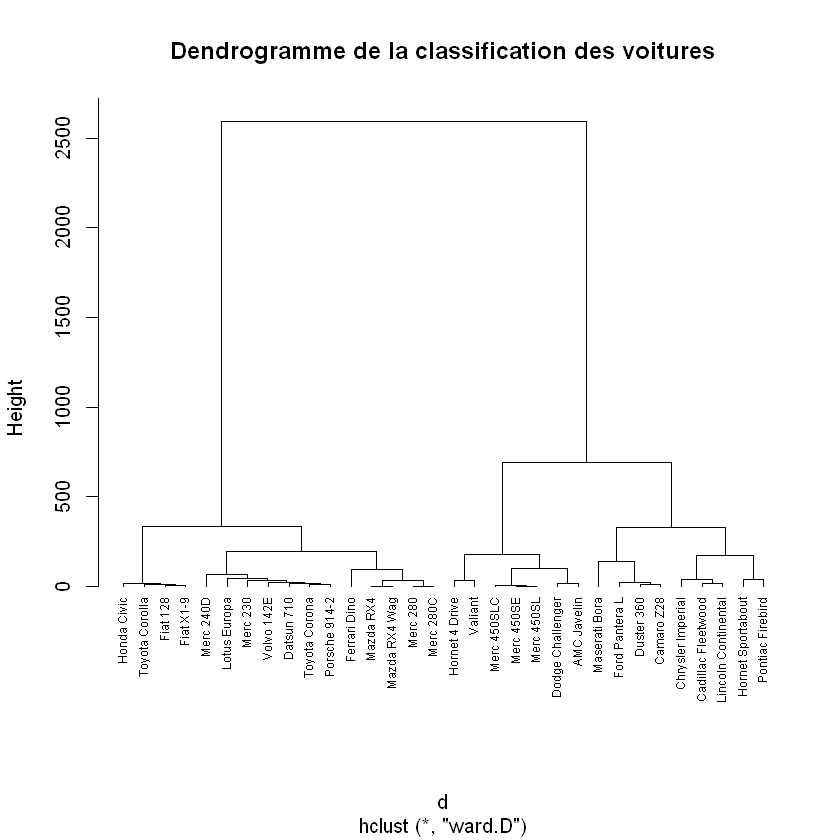

In [ ]:
plot(Hierar_cl, cex = 0.6, hang = -1,, main = "Dendrogramme de la classification des voitures")


<h3>Découper le dendrogramme</h3>

Pour obtenir une partition de la population, il suffit de découper le dendrogramme obtenu à une certaine hauteur. En premier lieu, une analyse de la forme du dendrogramme pourra nous donner une indication sur le nombre de classes à retenir. Dans notre exemple, deux branches bien distinctes apparaissent sur l’arbre.

Pour nous aider, nous pouvons représenter les sauts d’inertie du dendrogramme selon le nombre de classes retenues.

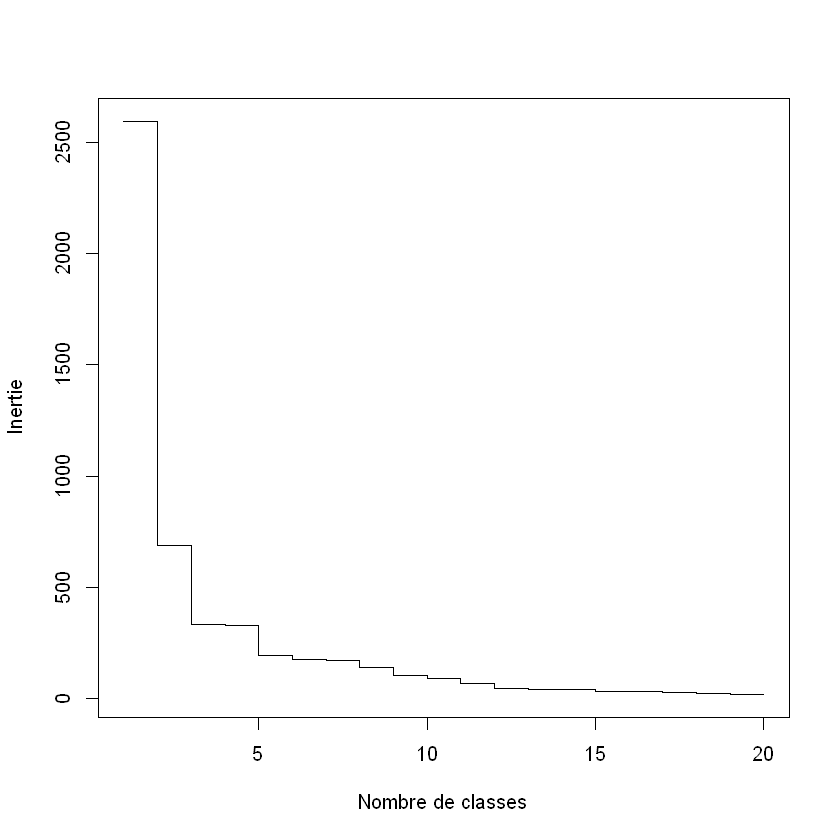

In [ ]:
inertie <- sort(Hierar_cl$height, decreasing = TRUE)
plot(inertie[1:20], type = "s", xlab = "Nombre de classes", ylab = "Inertie")


On voit trois sauts assez nets à 2, 3 et 5 classes, que nous avons représentés ci-dessous respectivement en vert, en rouge et en bleu.

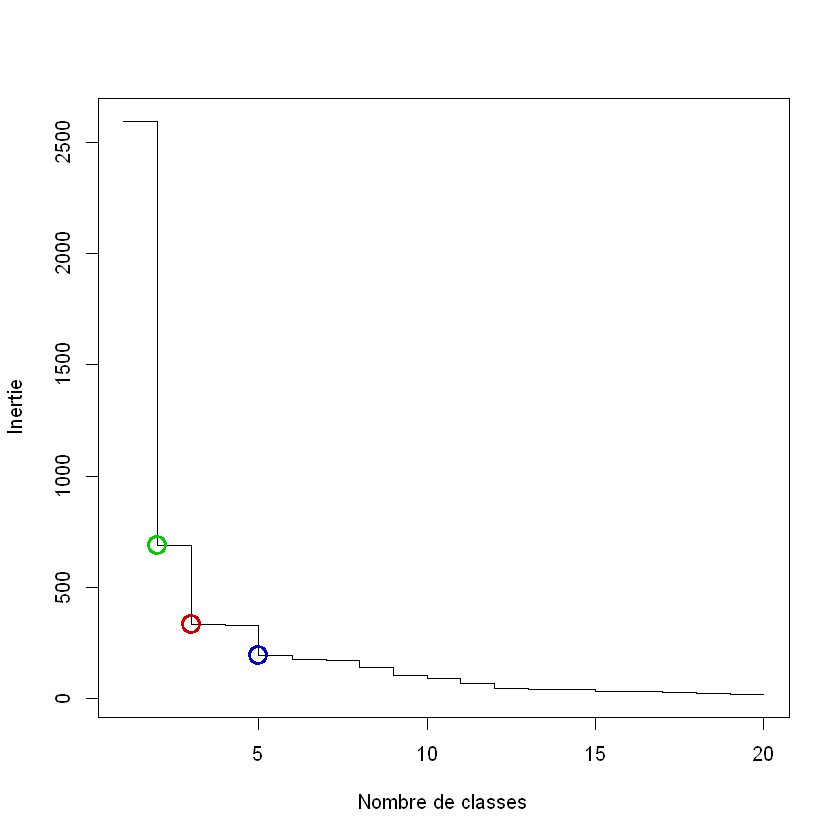

In [ ]:
plot(inertie[1:20], type = "s", xlab = "Nombre de classes", ylab = "Inertie")
points(c(2, 3, 5), inertie[c(2, 3, 5)], col = c("green3", "red3", "blue3"), cex = 2, lwd = 3)

*****************************************************************************************

La fonction rect.hclust permet de visualiser les différentes partitions directement sur le dendrogramme.

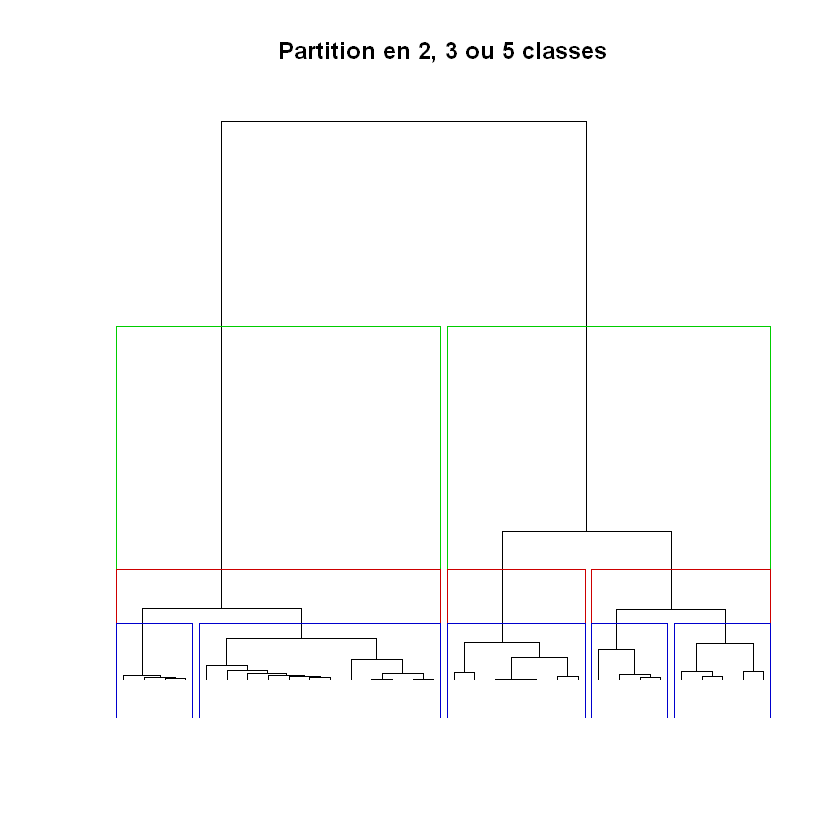

In [ ]:
plot(Hierar_cl, labels = FALSE, main = "Partition en 2, 3 ou 5 classes", xlab = "", ylab = "", sub = "", axes = FALSE, hang = -1)
rect.hclust(Hierar_cl, 2, border = "green3")
rect.hclust(Hierar_cl, 3, border = "red3")
rect.hclust(Hierar_cl, 5, border = "blue3")

L’extension JLutils (disponible sur GitHub) propose une fonction best.cutree qui permet de calculer cette indicateur à partir de n’importe quel dendrogramme calculé avec hclust ou agnes.

Par défaut, best.cutree indique quelle serait la meilleure partition entre 3 et 20 classes.

In [ ]:
#install.packages("remotes")
#remotes::install_github("larmarange/JLutils")

In [ ]:
library(JLutils)

In [ ]:
best.cutree(Hierar_cl)

[1] 3


In [ ]:
library(summarytools)
newTree <-cutree(Hierar_cl,3)
freq(newTree)

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
1,16,50.000,50.000,50.000,50.000
2,7,21.875,71.875,21.875,71.875
3,9,28.125,100.000,28.125,100.000
<NA>,0,NA,NA,0.000,100.000
Total,32,100.000,100.000,100.000,100.000


*****************************************************************************************

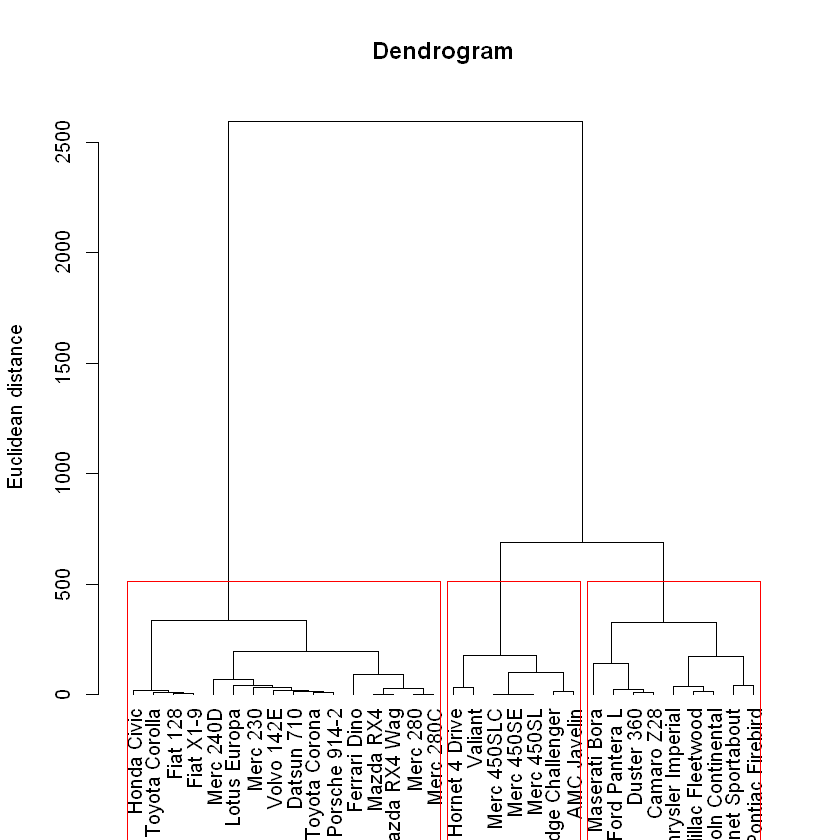

In [ ]:
library(dendextend)
dend <- as.dendrogram(Hierar_cl)
plot(dend, xlab = "", sub="", ylab = "Euclidean distance",
     main = "Dendrogram")
rect.dendrogram(dend, k=3, border="red")

Le tracé indique le dendrogramme après avoir été coupé. Les lignes rouge indiquent le nombre de clusters

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


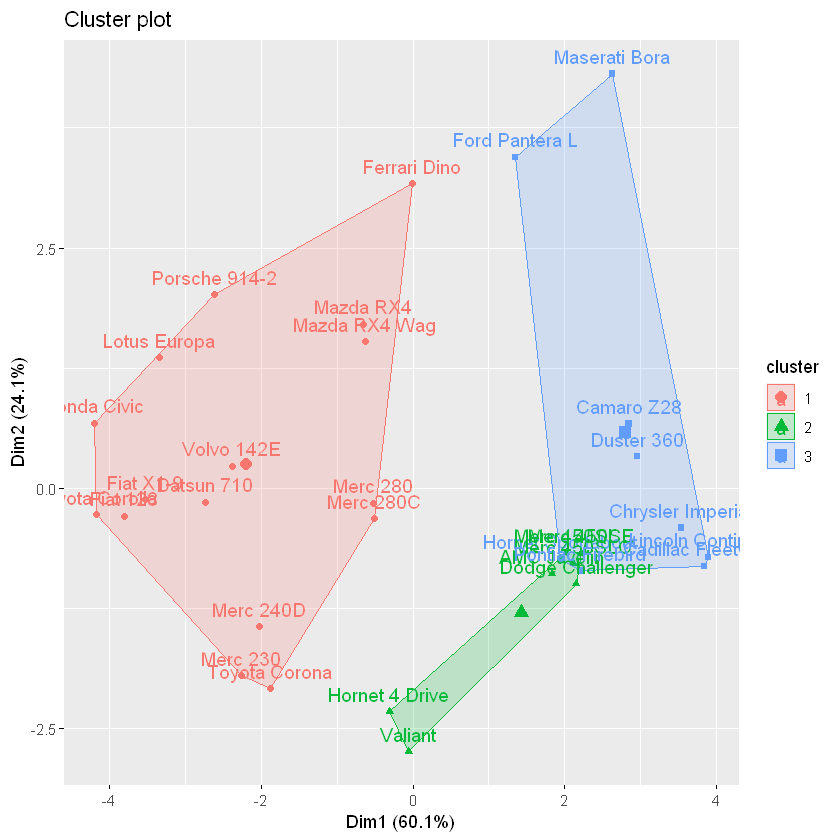

In [ ]:
library(factoextra)
fviz_cluster(list(data = mtcars, cluster = newTree))